# Pymaceuticals Inc.
---

### Analysis

- Based on the boxplots as well as the tumor volume summary statistics, Capomulin and Ramicane seem a lot more effective at reducing tumor size than the other treaments. The means and medians and varainces are much lower than the rest.
- However, the bar charts show that these two treaments have more data points than the rest of the treaments, so that will have to be investigated further to make sure enough time was given to each of the treaments.
- It is important to note that there is a strong positive correlation between mouse weight and tumor size so more investigation is necessary to make sure a good distribution of mouse weights are present for each drug treament program so as to not bias the results.
- The pie charts show an even ratio of male to female mice so this factor likely won't bias the results.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = mouse_metadata.merge(study_results, on = "Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merged_data["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df= merged_data.duplicated(subset = ['Mouse ID' , "Timepoint"])
i = 0
for x in df:
    if x == True:
        print(i)
    i+=1

merged_data.iloc[908:921, :]

909
911
913
915
917


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
range = np.arange(908,921)
cleaned_data = merged_data.drop(index = range)

In [5]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_data["Mouse ID"].unique())

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_data = cleaned_data.groupby("Drug Regimen")
mean_TV = grouped_data["Tumor Volume (mm3)"].mean()
med_TV = grouped_data["Tumor Volume (mm3)"].median()
var_TV = grouped_data["Tumor Volume (mm3)"].var()
stdev_TV = grouped_data["Tumor Volume (mm3)"].std()
sem_TV = grouped_data["Tumor Volume (mm3)"].sem()

TV_data = pd.DataFrame( { "Mean Tumor Volume" : mean_TV, "Median Tumor Volume": med_TV, "Tumor Volume Variance" : var_TV,
                         "Tumor Volume Std. Dev." : stdev_TV, "Tumor Volume Std. Err." : sem_TV } )
TV_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': '# of Observed Mouse Timepoints for each Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

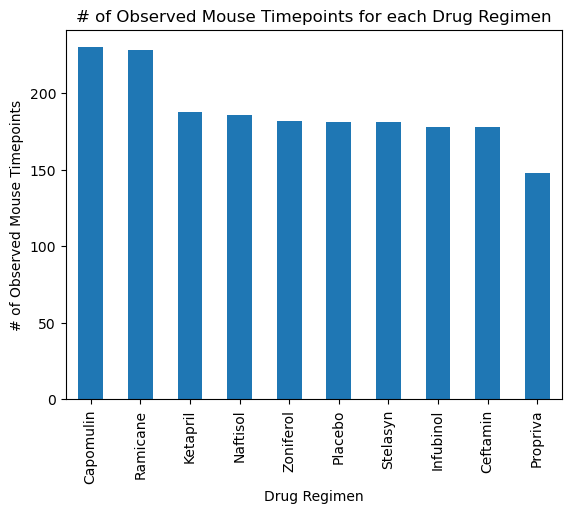

In [7]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_counts = cleaned_data["Drug Regimen"].value_counts()
mice_counts.plot( kind = "bar" , ylabel = "# of Observed Mouse Timepoints", title = "# of Observed Mouse Timepoints for each Drug Regimen")

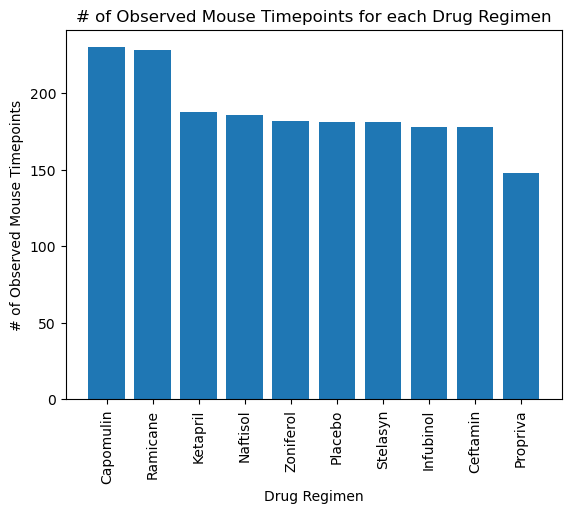

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(mice_counts.index, mice_counts)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)
plt.title("# of Observed Mouse Timepoints for each Drug Regimen")
plt.show()

<Axes: ylabel='Sex'>

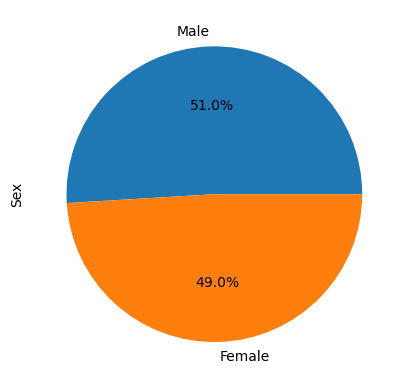

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = cleaned_data["Sex"].value_counts()
sex_counts.plot(kind = "pie", autopct = "%1.1f%%", ylabel = "Sex")

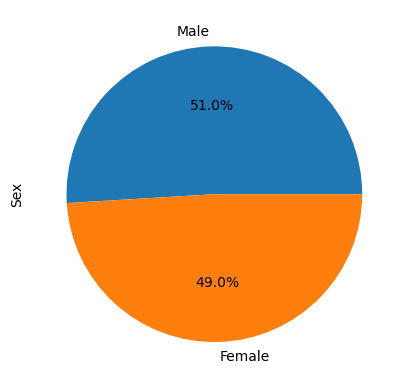

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= ["Male", "Female"]
plt.pie(sex_counts,autopct = "%1.1f%%", labels=labels)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max()

#The rubric calls for the index to be reset and to retrieve the maximum timepoint for each mouse but I think this is unnecessary by using merge. I'll leave the code here in case though.
# max_timepoint=max_timepoint.reset_index()
# max_timepoint["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_TV=pd.merge( cleaned_data, max_timepoint, on = ["Mouse ID","Timepoint"], how = "inner")

In [12]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
TV_list = []
boxplot_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in Drug_list:
    rows=final_TV[final_TV["Drug Regimen"] == x] 
    # add subset 
    TV_list = rows["Tumor Volume (mm3)"]
    # Determine outliers using upper and lower bounds
    quartiles=TV_list.quantile([.25,.5,.75])
    lq=quartiles[.25]
    uq=quartiles[.75]
    iqr=uq-lq
    lb=lq - (1.5*iqr)
    ub=uq + (1.5*iqr)
    for y in TV_list:
        if y > ub or y < lb:
            print(f"{y} is a potential outlier for {x}")
    boxplot_list.append(TV_list)

36.3213458 is a potential outlier for Infubinol


Text(0.5, 1.0, 'Box Plots of Final Tumor Volumes for Different Treatment Groups')

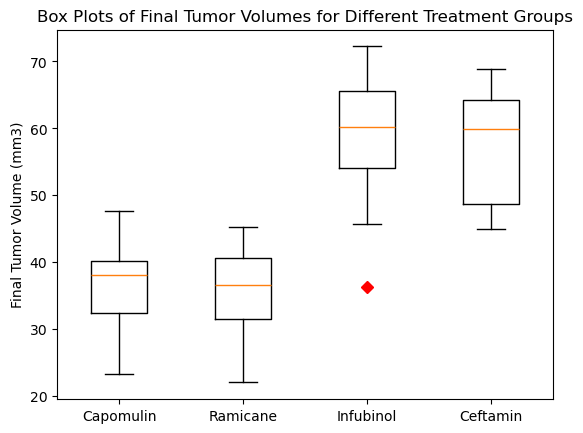

In [13]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(boxplot_list, 0 ,'rD')
plt.xticks([1,2,3,4] , Drug_list)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Box Plots of Final Tumor Volumes for Different Treatment Groups")

## Line and Scatter Plots

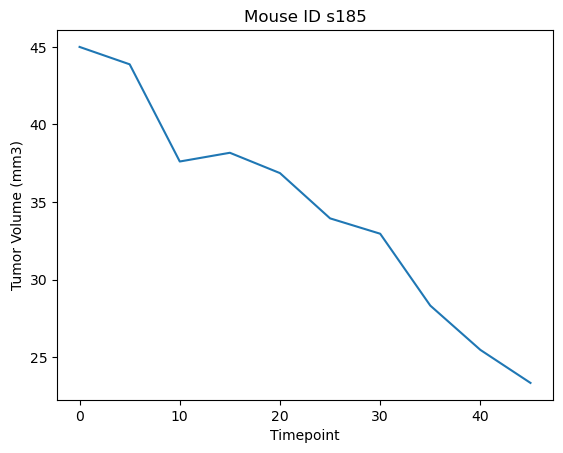

In [14]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
lp_rows = cleaned_data[cleaned_data["Mouse ID"] == "s185"]
x_axis = lp_rows["Timepoint"]
y_axis = lp_rows["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse ID s185")
plt.show()

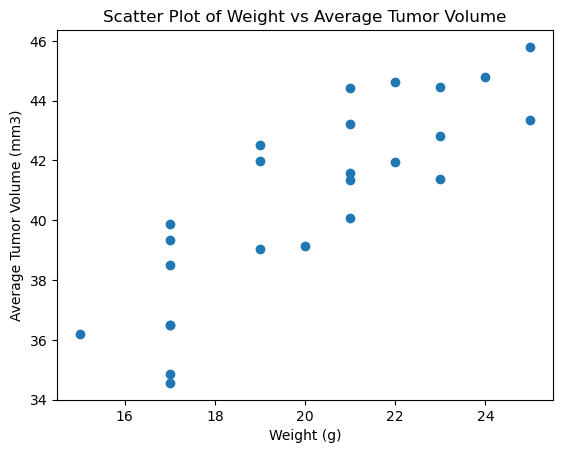

In [15]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
sp_rows = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
Ca_avgTV = sp_rows.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
Ca_avgW = sp_rows.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(Ca_avgW, Ca_avgTV)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Scatter Plot of Weight vs Average Tumor Volume")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


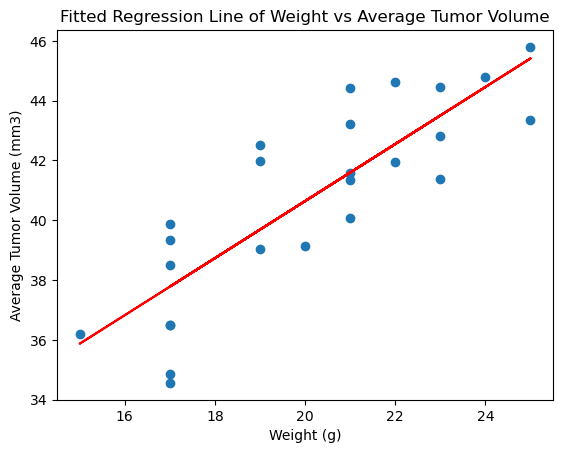

In [16]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, r, var, std_err = st.linregress(Ca_avgW, Ca_avgTV)
fit = slope * Ca_avgW + intercept
print(f"The correlation between mouse weight and average tumor volume is {round(r,2)}")
plt.scatter(Ca_avgW, Ca_avgTV)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(Ca_avgW, fit, color = 'r')
plt.title("Fitted Regression Line of Weight vs Average Tumor Volume")
plt.show()